In [40]:
import matplotlib.pyplot as plt 
import networkx as nx 
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import louvain_communities, label_propagation_communities, kernighan_lin_bisection

In [41]:
G = nx.read_edgelist('congress_network/congress.edgelist')

Communities detected by Girvan-Newman:
Community 1: ['129', '304', '349', '22', '40', '439', '157', '460', '455', '196', '464', '8', '438', '267', '433', '151', '368', '278', '288', '426', '392', '224', '180', '420', '340', '233', '179', '107', '174', '290', '114', '23', '339', '306', '471', '294', '132', '434', '25', '149', '469', '410', '258', '148', '135', '265', '78', '271', '175', '69', '350', '104', '48', '155', '381', '295', '453', '366', '184', '12', '360', '432', '195', '282', '145', '302', '163', '165', '36', '373', '275', '226', '276', '442', '303', '192', '312', '173', '305', '448', '178', '166', '467', '81', '159', '357', '126', '183', '204', '217', '270', '45', '213', '41', '313', '125', '370', '83', '311', '168', '331', '240', '35', '79', '405', '249', '335', '377', '232', '102', '456', '428', '380', '177', '119', '140', '424', '371', '430', '55', '327', '58', '90', '105', '378', '96', '37', '417', '352', '441', '17', '299', '347', '279', '3', '314', '28', '117', '298', 

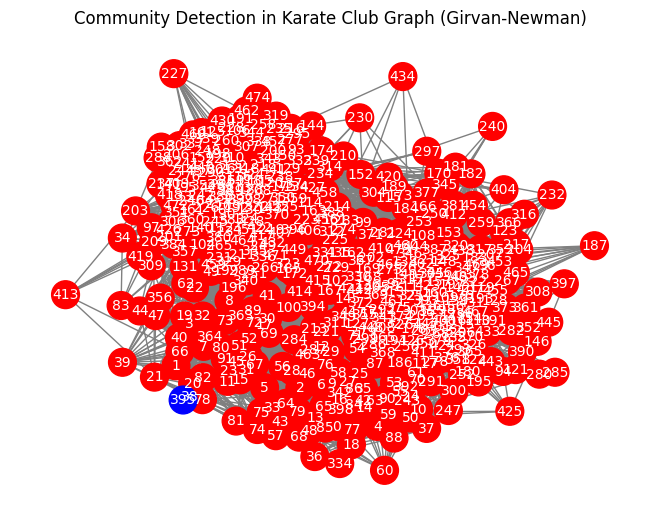

In [42]:
# Apply the Girvan-Newman community detection algorithm
communities = girvan_newman(G)
top_level_communities = next(communities)
community_list = [list(c) for c in top_level_communities]

# Assign a color to each community
color_map = {}
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
for idx, community in enumerate(community_list):
    for node in community:
        color_map[node] = colors[idx % len(colors)]  # cycle through colors

# Generate node colors
node_colors = [color_map[node] for node in G.nodes()]

print("Communities detected by Girvan-Newman:")
for idx, community in enumerate(community_list):
    print(f"Community {idx + 1}: {community}")

# Draw the graph with improved layout
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    node_color=node_colors,
    with_labels=True,
    edge_color='gray',
    node_size=400,
    font_size=10,
    font_color='white'
)

plt.title("Community Detection in Karate Club Graph (Girvan-Newman)")
plt.show()

In [43]:
kl_communities = kernighan_lin_bisection(G)
kl_communities = [list(kl_communities[0]), list(kl_communities[1])]
print("Kernighan-Lin Communities:")
for idx, community in enumerate(kl_communities):
    print(f"Community {idx + 1}: {sorted(community)}")

Kernighan-Lin Communities:
Community 1: ['0', '10', '102', '107', '108', '109', '110', '111', '117', '119', '12', '121', '122', '123', '126', '127', '128', '13', '135', '136', '138', '139', '14', '142', '145', '147', '148', '149', '153', '154', '155', '156', '157', '16', '160', '165', '166', '167', '169', '170', '171', '173', '176', '177', '178', '179', '18', '180', '182', '183', '184', '186', '187', '189', '193', '194', '195', '197', '2', '202', '204', '205', '207', '212', '215', '217', '221', '222', '224', '229', '232', '236', '24', '243', '25', '250', '252', '253', '254', '256', '259', '262', '263', '264', '267', '268', '27', '270', '275', '278', '279', '28', '281', '282', '284', '285', '286', '287', '291', '292', '293', '296', '297', '298', '299', '300', '303', '305', '308', '311', '313', '315', '316', '317', '320', '321', '325', '326', '327', '33', '330', '332', '334', '341', '345', '346', '347', '348', '349', '35', '352', '353', '355', '358', '36', '361', '365', '366', '367', '36

In [44]:
# Compute Louvain communities using built-in function
lv_communities = louvain_communities(G, seed=42)  # optional seed for reproducibility

# Convert to list of lists (already in correct format)
print("Louvain Communities:")
for idx, community in enumerate(lv_communities):
    print(f"Community {idx + 1}: {community}")

Louvain Communities:
Community 1: {'471', '356', '395', '311', '168', '266', '240', '408', '213'}
Community 2: {'378', '96', '280', '110', '291', '304', '349', '92', '352', '439', '157', '215', '136', '317', '460', '355', '347', '455', '279', '465', '169', '256', '438', '28', '320', '267', '461', '117', '298', '202', '433', '368', '170', '308', '53', '278', '421', '156', '296', '224', '358', '180', '138', '281', '187', '111', '420', '225', '367', '374', '179', '107', '403', '390', '391', '193', '292', '205', '436', '115', '375', '186', '286', '127', '445', '434', '149', '121', '469', '123', '416', '410', '297', '146', '147', '466', '148', '135', '109', '401', '243', '229', '152', '194', '122', '341', '250', '376', '155', '473', '454', '94', '404', '325', '447', '176', '381', '345', '361', '321', '453', '366', '128', '184', '332', '369', '207', '195', '153', '282', '222', '145', '387', '108', '197', '165', '443', '372', '373', '268', '275', '346', '425', '189', '253', '160', '303', '442

In [45]:
lp_communities = list(label_propagation_communities(G))
print("Label Propagation Communities:")
for idx, community in enumerate(lp_communities):
  print(f"Community {idx + 1}: {sorted(community)}")

Label Propagation Communities:
Community 1: ['0', '1', '10', '100', '102', '107', '108', '109', '11', '110', '111', '115', '117', '119', '12', '121', '122', '123', '126', '127', '128', '13', '135', '136', '138', '139', '14', '142', '145', '146', '147', '148', '149', '15', '153', '154', '155', '156', '157', '16', '160', '162', '165', '166', '167', '168', '169', '17', '170', '171', '173', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '189', '19', '193', '194', '195', '197', '2', '20', '202', '204', '205', '207', '21', '212', '213', '214', '215', '217', '22', '221', '222', '224', '225', '229', '23', '230', '232', '236', '24', '240', '243', '247', '25', '250', '252', '253', '254', '256', '259', '26', '262', '263', '264', '267', '268', '27', '270', '272', '274', '275', '278', '279', '28', '280', '281', '282', '284', '285', '286', '287', '29', '291', '292', '293', '296', '297', '298', '299', '3', '30', '300', '303', '304', '305', '308', '31', '311'

In [46]:
from networkx.algorithms.community.quality import modularity

modularity_girvan = modularity(G, community_list)
modularity_kl = modularity(G, kl_communities)
modularity_louvain = modularity(G, lv_communities)
modularity_lp = modularity(G, lp_communities)

print(f"Modularity (Girvan-Newman): {modularity_girvan}")
print(f"Modularity (Kernighan-Lin): {modularity_kl}")
print(f"Modularity (Louvain): {modularity_louvain}")
print(f"Modularity (Label Propagation): {modularity_lp}")

Modularity (Girvan-Newman): -8.122792587852829e-08
Modularity (Kernighan-Lin): 0.3742529344179383
Modularity (Louvain): 0.44159564618068003
Modularity (Label Propagation): 0.3641457482478272


In [47]:
#Use function from lab 3 file

def coverage(graph, communities):
    intra_edges = sum(graph.subgraph(c).size() for c in communities)
    total_edges = graph.size()
    return intra_edges / total_edges if total_edges > 0 else 0

def performance(graph, communities):
    n = graph.order()
    intra_edges = sum(graph.subgraph(c).size() for c in communities)
    inter_non_edges = sum(
        len(set(c1).intersection(set(c2))) == 0 
        for i, c1 in enumerate(communities) 
        for c2 in communities[i+1:]
    ) * (len(graph) * (len(graph) - 1) / 2 - graph.size())
    total_possible = n * (n - 1) / 2
    return (intra_edges + inter_non_edges) / total_possible if total_possible > 0 else 0

def evaluate_community_quality(G, communities):
    return {
        "modularity": modularity(G, communities),
        "coverage": coverage(G, communities),
        "performance": performance(G, communities)
    }

quality_scores = {
    "Girvan-Newman": evaluate_community_quality(G, community_list),
    "Kernighan–Lin": evaluate_community_quality(G, kl_communities),
    "Louvain": evaluate_community_quality(G, lv_communities),
    "Label Propagation": evaluate_community_quality(G, lp_communities),
}
print("Community Quality Scores:")
for method, scores in quality_scores.items():
    print(f"{method}: {scores}")

Community Quality Scores:
Girvan-Newman: {'modularity': -8.122792587852829e-08, 'coverage': 0.9998043435726863, 'performance': 0.9999822340661781}
Kernighan–Lin: {'modularity': 0.3742529344179383, 'coverage': 0.8432792017217765, 'performance': 0.9857694870086608}
Louvain: {'modularity': 0.44159564618068003, 'coverage': 0.755135981216983, 'performance': 5.5237574950033315}
Label Propagation: {'modularity': 0.3641457482478272, 'coverage': 0.8678340833496381, 'performance': 0.9879991117033089}


In [48]:
# Calculate the average path length of the graph
avg_path_length = nx.average_shortest_path_length(G)
print(f"Average Path Length: {avg_path_length}")

Average Path Length: 2.0638862980235397


In [53]:
label_comms = list(lp_communities)
kl_comms = list(kl_communities)

# Flatten to dictionaries: node -> community ID
label_map = {}
for i, comm in enumerate(label_comms):
    for node in comm:
        label_map[node] = i

kl_map = {}
for i, comm in enumerate(kl_comms):
    for node in comm:
        kl_map[node] = i

print("Label Propagation Mapping:")
print(label_map)

# --- Detect overlapping nodes ---
# Nodes that appear in both maps and are in different communities
overlapping_nodes = set()
for node in sorted(G.nodes()):
    if node in label_map and node in kl_map:
        print(f"Node {node}: Label Propagation Community {label_map[node]}, Kernighan-Lin Community {kl_map[node]}")
        if label_map[node] == kl_map[node]:
            overlapping_nodes.add(node)
            print(f"Node {node} is in the same community in both methods: {label_map[node]}")

# --- Result ---
print("Overlapping nodes between Label Propagation and Kernighan–Lin communities:")
print(sorted(overlapping_nodes))

Label Propagation Mapping:
{'304': 0, '349': 0, '22': 0, '40': 0, '439': 0, '157': 0, '460': 0, '455': 0, '8': 0, '438': 0, '267': 0, '433': 0, '368': 0, '278': 0, '392': 0, '224': 0, '180': 0, '420': 0, '179': 0, '107': 0, '23': 0, '434': 0, '25': 0, '149': 0, '469': 0, '410': 0, '148': 0, '135': 0, '78': 0, '69': 0, '48': 0, '155': 0, '381': 0, '453': 0, '366': 0, '184': 0, '12': 0, '195': 0, '145': 0, '282': 0, '165': 0, '36': 0, '373': 0, '275': 0, '442': 0, '303': 0, '173': 0, '305': 0, '448': 0, '178': 0, '166': 0, '467': 0, '81': 0, '126': 0, '183': 0, '204': 0, '217': 0, '270': 0, '45': 0, '213': 0, '41': 0, '313': 0, '83': 0, '311': 0, '168': 0, '331': 0, '240': 0, '35': 0, '79': 0, '405': 0, '377': 0, '232': 0, '102': 0, '177': 0, '119': 0, '424': 0, '371': 0, '55': 0, '327': 0, '58': 0, '90': 0, '378': 0, '96': 0, '37': 0, '352': 0, '17': 0, '299': 0, '347': 0, '279': 0, '3': 0, '28': 0, '117': 0, '298': 0, '394': 0, '296': 0, '358': 0, '187': 0, '111': 0, '225': 0, '84': 0,

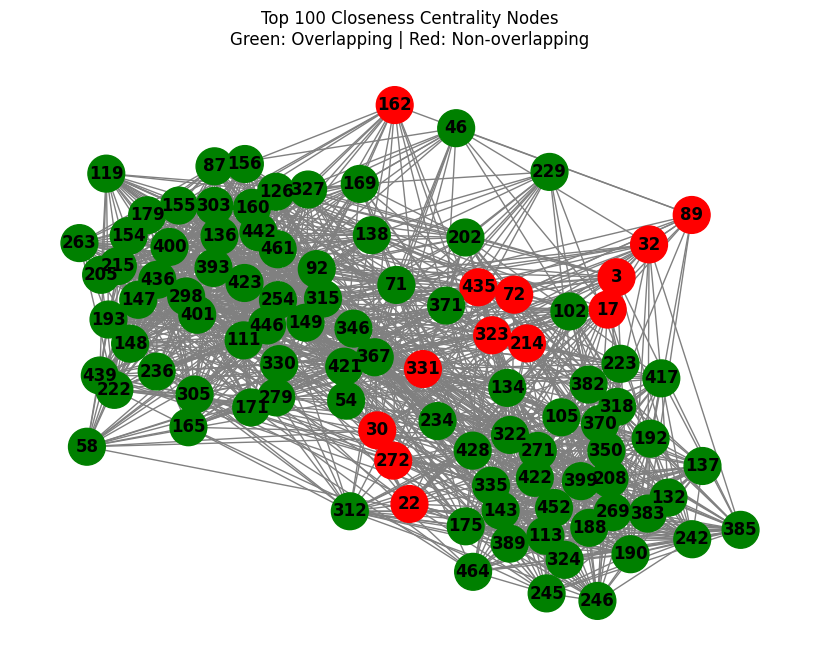

In [52]:
#Compute closeness centrality for all nodes in G
closeness_centrality = nx.closeness_centrality(G)

#Sort the closeness centrality values in descending order
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Get top n nodes
n = 100
top_n_closeness = sorted_closeness[:n]

# Create subgraph of top n nodes
top_n_nodes = [node for node, _ in top_n_closeness]
subgraph = G.subgraph(top_n_nodes).copy()

# --- Assign Colors 
colors = []
for node in subgraph.nodes():
    if node in overlapping_nodes:
        colors.append("green")  # Overlapping node
    else:
        colors.append("red")    # Not overlapping

# --- Draw ---
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=True, node_color=colors, node_size=700, font_weight='bold', edge_color='gray')
plt.title(f"Top {n} Closeness Centrality Nodes\nGreen: Overlapping | Red: Non-overlapping")
plt.show()